The contents of this course including lectures, labs, homework assignments, and exams have all been adapted from the [Data 8 course at University California Berkley](https://data.berkeley.edu/education/courses/data-8). Through their generosity and passion for undergraduate education, the Data 8 community at Berkley has opened their content and expertise for other universities to adapt in the name of undergraduate education.

In [2]:
!pip install datascience -q
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Chapter 7 Review

#### What type of data do you typically use with line graphs?
<font color='blue'>Time series data, sequential data, where x has one corresponding y value</font>

#### When do you typically use with scatter plots?
<font color='blue'>Looking for a correlation or relation ship between x and y.</font>

#### What type of data do you typically use with bar charts?
<font color='blue'>Categorical data.</font>

#### When do you typically use with histogram plots?
<font color='blue'>When looking at a distribution of values.</font>

In [4]:
# Import the skyscrappers.csv as skyscrapers
skyscrapers = Table().read_table('skyscrapers.csv')
skyscrapers

name,material,city,height,completed
One World Trade Center,composite,New York City,541.3,2014
Willis Tower,steel,Chicago,442.14,1974
432 Park Avenue,concrete,New York City,425.5,2015
Trump International Hotel & Tower,concrete,Chicago,423.22,2009
Empire State Building,steel,New York City,381,1931
Bank of America Tower,composite,New York City,365.8,2009
Stratosphere Tower,concrete,Las Vegas,350.22,1996
Aon Center,steel,Chicago,346.26,1973
John Hancock Center,steel,Chicago,343.69,1969
WITI TV Tower,steel,Shorewood,329,1962


completed,count
1909,1
1913,1
1928,1
1929,2
1930,3
1931,4
1932,2
1933,1
1960,1
1961,1


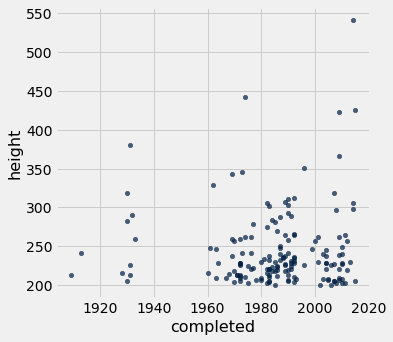

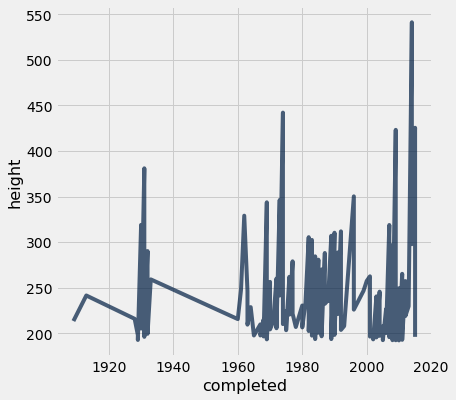

In [12]:
# Plot completed vs height
skyscrapers.where('height', are.above_or_equal_to(200)).scatter('completed', "height")
skyscrapers.plot('completed', "height")
skyscrapers.group('completed')

bin,height count,percent height
200,117,46.8
250,27,10.8
300,12,4.8
350,3,1.2
400,0,0


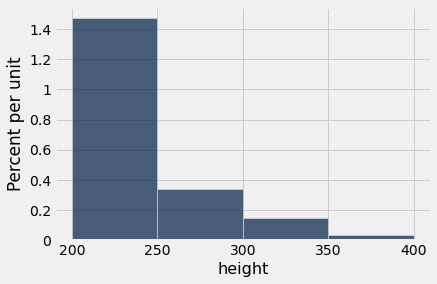

In [48]:
# Plot the height of the sky scrapers. Make another plot of when they were completed.
bins = skyscrapers.bin('height', bins = np.arange(200, 401, 50))
bins = bins.with_column("percent height", bins.column('height count')/(50*bins.num_rows)*100)
skyscrapers.hist("height", bins = np.arange(200, 401, 50))
bins

In [ ]:
#Using the histogram plot, calculate how many skyscrapers are between 250 and 300 meters?
# Hint: make the histogram bins a useful width


In [ ]:
# Verify your above answer using data from the skyscraper table.


In [ ]:
# Using the histogram plot, calculate how many skyscrapers were completed between 2010 and 2020?
# Hint: make the histogram bins a useful width


In [ ]:
# Verify your above answer using data from the skyscraper table.


In [ ]:
# BONUS:
# Plot the average height by composite


In [ ]:
# BONUS:
# Plot the average height by year

# Chapter 8: Functions and Tables

In [49]:
def triple(x):
    '''triple x'''
    return 3*x
triple(10)

30

### Function synatx

<img src=Function.PNG style="width: 900px;"/>

### Note About Scopes

In [50]:
x

NameError: name 'x' is not defined

In [51]:
x = 5

In [52]:
triple(2 * x)

30

In [53]:
x

5

### Type Agnostic

In [54]:
triple('ha')

'hahaha'

In [56]:
np.arange(4)

array([0, 1, 2, 3])

In [55]:
triple(np.arange(4))

array([0, 3, 6, 9])

## What does the following function do?  What kind of input does it take?

In [58]:
def percent_of_total(s):
    return np.round(s / sum(s) * 100, 2)

In [59]:
percent_of_total(make_array(1,2,3,4,5))

array([ 6.67, 13.33, 20.  , 26.67, 33.33])

In [60]:
percent_of_total(make_array(1, 213, 38))

array([ 0.4 , 84.52, 15.08])

### Multiple Arguments

$ c^2 = a^2 + b^2 \hspace{20 pt} => \hspace{20 pt} c = \sqrt{ a^2 + b^2 } $

In [61]:
def hypotenuse(a,b):
    hypot_squared = (a ** 2 + b ** 2)
    return hypot_squared ** 0.5

In [62]:
hypotenuse(9, 12)

15.0

In [63]:
hypotenuse(3, 4)

5.0

## Applying functions to Columns
The apply method creates an array by applying a function on every element in input column(s)
* First argument: Function to apply
* Other arguments: The input column(s)

**table_name.apply(function_name, 'column_label')**

In [64]:
ages = Table().with_columns(
    'Person', make_array('Jim', 'Pam', 'Michael', 'Creed'),
    'Birth Year', make_array(1985, 1988, 1967, 1904)
)
ages

Person,Birth Year
Jim,1985
Pam,1988
Michael,1967
Creed,1904


In [65]:
def cap_at_1980(x):
    return min(x, 1980)

In [66]:
cap_at_1980(1975)

1975

In [67]:
cap_at_1980(1991)

1980

In [68]:
ages.apply(cap_at_1980, 'Birth Year')

array([1980, 1980, 1967, 1904], dtype=int64)

In [69]:
def pick_up_phone(name):
    return 'Dunder Mifflin, this is ' + name

In [70]:
ages.apply(pick_up_phone, 'Person')

array(['Dunder Mifflin, this is Jim', 'Dunder Mifflin, this is Pam',
       'Dunder Mifflin, this is Michael', 'Dunder Mifflin, this is Creed'],
      dtype='<U31')

In [71]:
def name_and_age(name, year):
    age = 2021 - year
    return name + ' is ' + str(age)

In [72]:
ages.apply(name_and_age, 'Person', 'Birth Year')

array(['Jim is 36', 'Pam is 33', 'Michael is 54', 'Creed is 117'],
      dtype='<U13')

## Prediction
We will use a data set collected by Sir Francis Galton (1822 - 1911).  The table has the heights of parents and their adult children (in inches).  The "midparentHeight" column is the acerage of height of the two parents. The "childNum is the childs birth rank (1 = oldest).  The dataset was collected to predict child height from parents height. 

In [73]:
galton = Table.read_table('galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


##### We will use the table to see if there is a positive association with parents mid height and child height

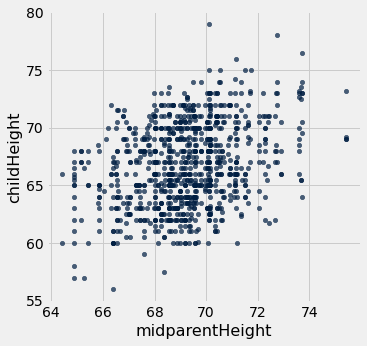

In [74]:
galton.scatter('midparentHeight', 'childHeight')

##### Suppose we want to predict childs height if their parent mid height is 68 inches.  We could find the aveage of childern heights ofparents mid height whos mid height is 68 +/- 0.5 inches tall. 

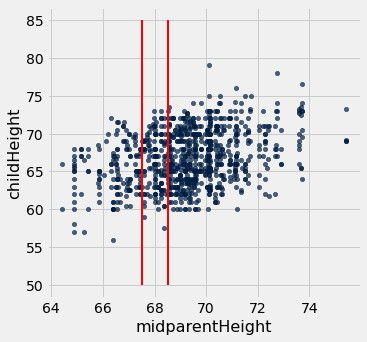

In [75]:
galton.scatter('midparentHeight', 'childHeight')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2);

In [77]:
nearby = galton.where('midparentHeight', are.between(67.5, 68.5))
nearby
nearby_mean = nearby.column('childHeight').mean()
nearby_mean

66.24045801526718

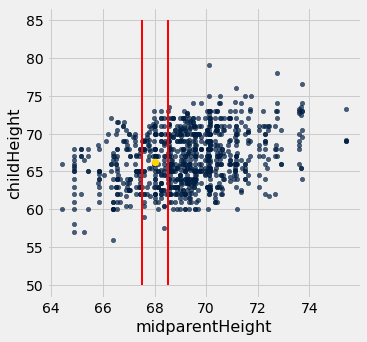

In [78]:
galton.scatter('midparentHeight', 'childHeight')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, nearby_mean, color='gold', s=50);

##### Lets wrap this calculation into a function.

In [79]:
def predict(h):
    nearby = galton.where('midparentHeight', are.between(h - 1/2, h + 1/2))
    return nearby.column('childHeight').mean()

In [80]:
predict(68)

66.24045801526718

In [81]:
predict(70)

67.27285067873302

In [82]:
predict(73)

69.5

##### Now we can apply the function to each mid partent height column to get a prediction of the childs height

In [83]:
predicted_heights = galton.apply(predict, 'midparentHeight')
predicted_heights

array([70.1       , 70.1       , 70.1       , 70.1       , 70.41578947,
       70.41578947, 70.41578947, 70.41578947, 68.5025    , 68.5025    ,
       68.5025    , 68.5025    , 68.5025    , 68.5025    , 68.5025    ,
       66.43149606, 66.43149606, 66.43149606, 66.43149606, 66.43149606,
       66.43149606, 70.41578947, 70.41578947, 70.41578947, 70.41578947,
       70.41578947, 70.41578947, 70.41578947, 69.18571429, 69.18571429,
       69.18571429, 69.18571429, 68.66052632, 67.63423913, 67.63423913,
       67.63423913, 67.63423913, 67.63423913, 67.63423913, 67.63423913,
       67.63423913, 67.37410714, 68.77428571, 68.77428571, 68.77428571,
       68.77428571, 68.59230769, 68.59230769, 68.59230769, 68.07323944,
       68.07323944, 68.07323944, 68.07323944, 68.07323944, 68.07323944,
       68.07323944, 68.07323944, 68.07323944, 68.05465116, 68.05465116,
       68.05465116, 68.05465116, 68.05465116, 68.05465116, 67.56276596,
       67.56276596, 67.56276596, 67.71678832, 70.41578947, 70.41

In [84]:
galton = galton.with_column('predictedHeight', predicted_heights)
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight,predictedHeight
1,78.5,67,75.43,4,1,male,73.2,70.1
1,78.5,67,75.43,4,2,female,69.2,70.1
1,78.5,67,75.43,4,3,female,69,70.1
1,78.5,67,75.43,4,4,female,69,70.1
2,75.5,66.5,73.66,4,1,male,73.5,70.4158
2,75.5,66.5,73.66,4,2,male,72.5,70.4158
2,75.5,66.5,73.66,4,3,female,65.5,70.4158
2,75.5,66.5,73.66,4,4,female,65.5,70.4158
3,75,64,72.06,2,1,male,71,68.5025
3,75,64,72.06,2,2,female,68,68.5025


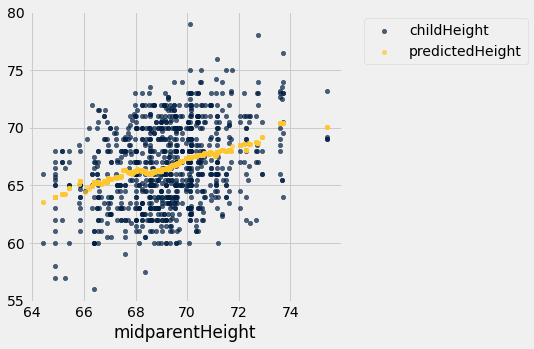

In [87]:
galton.select(
    'midparentHeight', 'childHeight', 'predictedHeight').scatter('midparentHeight')

Galton's calculations and visulaizations were similar to ours (except he had pencil and paper, not Python). He noticed the correlation between parents height and childrens height.  He noticed the averages through the scatter plot was roughly a straight line.  We know this line to be a *regression line* and is one of the most common methods of making predictions.

## Prediction Accuracy
How close is the regression line to the actual child height?  How close the line is to each true value will give us some insight in prediction accuracy and the uncertanity of our model.

Lets create a function to measure the accuacy of the predicted height to the actual height and apply the function to our data.

In [88]:
def difference(x, y):
    return x - y

In [89]:
pred_errs = galton.apply(difference, 'predictedHeight', 'childHeight')
pred_errs

array([-3.10000000e+00,  9.00000000e-01,  1.10000000e+00,  1.10000000e+00,
       -3.08421053e+00, -2.08421053e+00,  4.91578947e+00,  4.91578947e+00,
       -2.49750000e+00,  5.02500000e-01, -1.99750000e+00,  2.50000000e-03,
        1.50250000e+00,  4.00250000e+00,  5.50250000e+00, -5.56850394e+00,
       -2.56850394e+00, -1.56850394e+00, -6.85039370e-02,  3.93149606e+00,
        3.93149606e+00,  9.15789474e-01, -6.08421053e+00, -3.58421053e+00,
       -2.58421053e+00, -2.58421053e+00, -8.42105263e-02,  6.41578947e+00,
       -1.31428571e+00,  1.18571429e+00,  3.18571429e+00,  3.18571429e+00,
        3.16052632e+00, -6.36576087e+00, -2.36576087e+00, -3.65760870e-01,
        6.34239130e-01,  6.34239130e-01,  1.63423913e+00,  4.13423913e+00,
        4.63423913e+00,  2.37410714e+00, -2.22571429e+00,  6.77428571e+00,
        7.74285714e-01,  1.77428571e+00, -2.40769231e+00, -1.90769231e+00,
        1.89230769e+00, -3.92676056e+00, -2.42676056e+00, -2.12676056e+00,
       -2.12676056e+00, -

In [90]:
galton = galton.with_column('errors',pred_errs)
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight,predictedHeight,errors
1,78.5,67,75.43,4,1,male,73.2,70.1,-3.1
1,78.5,67,75.43,4,2,female,69.2,70.1,0.9
1,78.5,67,75.43,4,3,female,69,70.1,1.1
1,78.5,67,75.43,4,4,female,69,70.1,1.1
2,75.5,66.5,73.66,4,1,male,73.5,70.4158,-3.08421
2,75.5,66.5,73.66,4,2,male,72.5,70.4158,-2.08421
2,75.5,66.5,73.66,4,3,female,65.5,70.4158,4.91579
2,75.5,66.5,73.66,4,4,female,65.5,70.4158,4.91579
3,75,64,72.06,2,1,male,71,68.5025,-2.4975
3,75,64,72.06,2,2,female,68,68.5025,0.5025


We can view a histogram of the errors

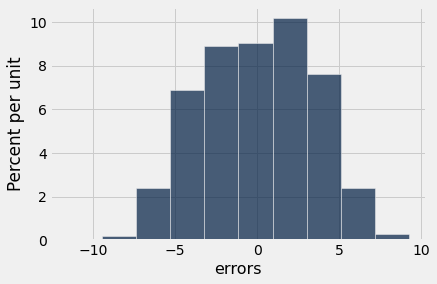

In [91]:
galton.hist('errors')

C:\Users\ksorauf\AppData\Local\Continuum\anaconda3\lib\site-packages\datascience\tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


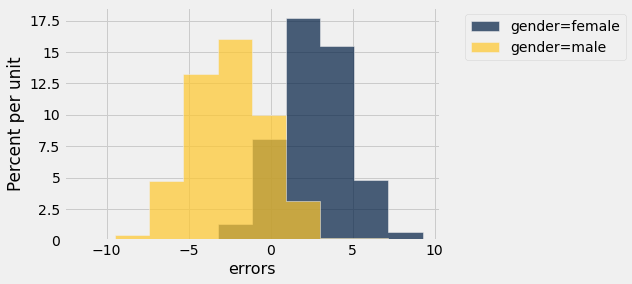

In [92]:
galton.hist('errors', group='gender')

## How does the prediction change if we factor gender in the prediction? 

In [93]:
def predict_gender(h, gender):
    galton_gender = galton.where('gender', are.equal_to(gender))
    nearby = galton_gender.where('midparentHeight', are.between(h - 1/2, h + 1/2))
    return nearby.column('childHeight').mean()

In [103]:
galton.where('gender', are.equal_to('female'))

family,father,mother,midparentHeight,children,childNum,gender,childHeight,predictedHeight,errors
1,78.5,67,75.43,4,2,female,69.2,70.1,0.9
1,78.5,67,75.43,4,3,female,69,70.1,1.1
1,78.5,67,75.43,4,4,female,69,70.1,1.1
2,75.5,66.5,73.66,4,3,female,65.5,70.4158,4.91579
2,75.5,66.5,73.66,4,4,female,65.5,70.4158,4.91579
3,75,64,72.06,2,2,female,68,68.5025,0.5025
4,75,64,72.06,5,3,female,67,68.5025,1.5025
4,75,64,72.06,5,4,female,64.5,68.5025,4.0025
4,75,64,72.06,5,5,female,63,68.5025,5.5025
5,75,58.5,69.09,6,4,female,66.5,66.4315,-0.0685039


In [94]:
gender_preds = galton.apply(predict_gender, 'midparentHeight', 'gender')
gender_preds

array([73.2       , 69.06666667, 69.06666667, 69.06666667, 73.48888889,
       73.48888889, 67.65      , 67.65      , 70.79545455, 65.7       ,
       70.79545455, 70.79545455, 65.7       , 65.7       , 65.7       ,
       69.08217054, 69.08217054, 69.08217054, 63.696     , 63.696     ,
       63.696     , 67.65      , 73.48888889, 73.48888889, 73.48888889,
       73.48888889, 67.65      , 67.65      , 66.44      , 66.44      ,
       66.44      , 66.44      , 65.75882353, 70.17234043, 70.17234043,
       64.98333333, 64.98333333, 64.98333333, 64.98333333, 64.98333333,
       64.98333333, 64.67788462, 71.17777778, 66.22941176, 71.17777778,
       71.17777778, 71.00952381, 71.00952381, 65.77222222, 70.84285714,
       70.84285714, 70.84285714, 70.84285714, 70.84285714, 65.38055556,
       65.38055556, 65.38055556, 65.38055556, 70.79047619, 70.79047619,
       70.79047619, 70.79047619, 65.44318182, 65.44318182, 65.08823529,
       65.08823529, 65.08823529, 64.89090909, 73.48888889, 73.48

In [96]:
galton_gender = galton.with_column('predictedHeight', galton.apply(predict_gender, 'midparentHeight', 'gender'))
galton_gender

family,father,mother,midparentHeight,children,childNum,gender,childHeight,predictedHeight,errors
1,78.5,67,75.43,4,1,male,73.2,73.2,-3.1
1,78.5,67,75.43,4,2,female,69.2,69.0667,0.9
1,78.5,67,75.43,4,3,female,69,69.0667,1.1
1,78.5,67,75.43,4,4,female,69,69.0667,1.1
2,75.5,66.5,73.66,4,1,male,73.5,73.4889,-3.08421
2,75.5,66.5,73.66,4,2,male,72.5,73.4889,-2.08421
2,75.5,66.5,73.66,4,3,female,65.5,67.65,4.91579
2,75.5,66.5,73.66,4,4,female,65.5,67.65,4.91579
3,75,64,72.06,2,1,male,71,70.7955,-2.4975
3,75,64,72.06,2,2,female,68,65.7,0.5025


In [97]:
galton_gender = galton_gender.with_column('errors', galton_gender.apply(difference, 'predictedHeight', 'childHeight'))

In [98]:
galton_gender

family,father,mother,midparentHeight,children,childNum,gender,childHeight,predictedHeight,errors
1,78.5,67,75.43,4,1,male,73.2,73.2,0
1,78.5,67,75.43,4,2,female,69.2,69.0667,-0.133333
1,78.5,67,75.43,4,3,female,69,69.0667,0.0666667
1,78.5,67,75.43,4,4,female,69,69.0667,0.0666667
2,75.5,66.5,73.66,4,1,male,73.5,73.4889,-0.0111111
2,75.5,66.5,73.66,4,2,male,72.5,73.4889,0.988889
2,75.5,66.5,73.66,4,3,female,65.5,67.65,2.15
2,75.5,66.5,73.66,4,4,female,65.5,67.65,2.15
3,75,64,72.06,2,1,male,71,70.7955,-0.204545
3,75,64,72.06,2,2,female,68,65.7,-2.3


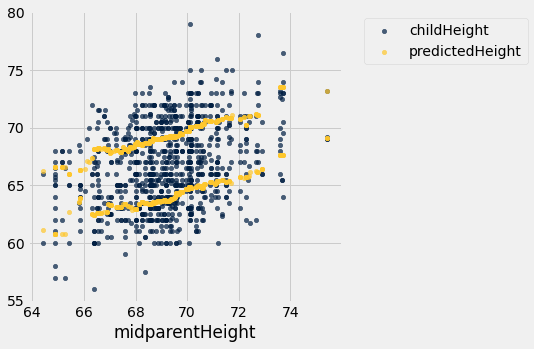

In [105]:
galton_gender.select(
    'midparentHeight', 'childHeight', 'predictedHeight').scatter('midparentHeight')

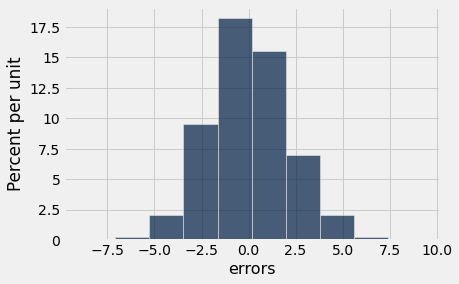

In [100]:
galton_gender.hist('errors')

C:\Users\ksorauf\AppData\Local\Continuum\anaconda3\lib\site-packages\datascience\tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


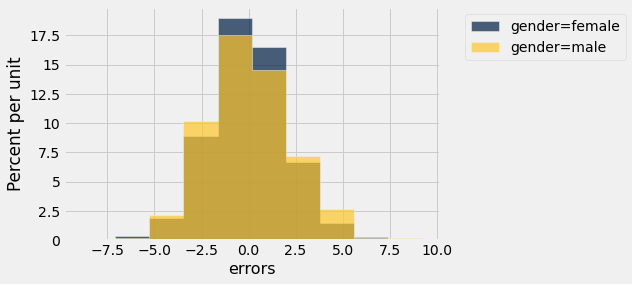

In [101]:
galton_gender.hist('errors', group='gender')

## Grouping

In [106]:
cones = Table.read_table("cones.csv")

In [107]:
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [108]:
cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


In [109]:
cones.drop('Color').group('Flavor', np.average)

Flavor,Price average
bubblegum,4.75
chocolate,5.08333
strawberry,4.4


In [110]:
cones.drop('Color').group('Flavor', min)

Flavor,Price min
bubblegum,4.75
chocolate,4.75
strawberry,3.55


### Find the total price of the cones by flavor 

In [111]:
cones.drop('Color').group('Flavor', sum)

Flavor,Price sum
bubblegum,4.75
chocolate,15.25
strawberry,8.8


## Grouping 2 Columns

In [112]:
cones.group(['Flavor', 'Color'])

C:\Users\ksorauf\AppData\Local\Continuum\anaconda3\lib\site-packages\datascience\tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


In [122]:
cones = cones.with_column('other numbers', [3,5,7,9,11,13])
cones.group(['Flavor', 'Color'], np.mean)

Flavor,Color,Price mean,other numbers mean
bubblegum,pink,4.75,13
chocolate,dark brown,5.25,9
chocolate,light brown,4.75,5
strawberry,pink,4.4,6


### Pivot tables rearrage the output of group

In [114]:
cones.pivot('Flavor', 'Color')

Color,bubblegum,chocolate,strawberry
dark brown,0,2,0
light brown,0,1,0
pink,1,0,2


In [116]:
cones.pivot('Flavor', 'Color', values='Price', collect=sum)

Color,bubblegum,chocolate,strawberry
dark brown,0,10.5,0
light brown,0,4.75,0
pink,4.75,0,8.8


## Load the nba_salaries.csv then relabel the '15-'16 SALARY colum as 'SALARY'

In [123]:
salary = Table().read_table('nba_salaries.csv')

### How much money did each team pay their players?

### What was the average salary at each position?

### What is the max salary of each position on each team?

## Joining

The general format for join is:

<code>table1.join(table1_column_for_joining, table2, table2_column_for_joining)

In [127]:
cones = cones.drop('other numbers')
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [128]:
ratings = Table().with_columns('Stars', [4.0, 4.5, 3.5],
                           'Flavor', ["strawberry", "chocolate", "bubblegum"])
ratings

Stars,Flavor
4,strawberry
4.5,chocolate
3.5,bubblegum


In [129]:
rated = cones.join('Flavor', ratings, 'Flavor')
rated

Flavor,Color,Price,Stars
bubblegum,pink,4.75,3.5
chocolate,light brown,4.75,4.5
chocolate,dark brown,5.25,4.5
chocolate,dark brown,5.25,4.5
strawberry,pink,3.55,4
strawberry,pink,5.25,4


## Demo of billionaires

CEO data: 100 = Demoratic party; 200 = Republican Party

In [130]:
billionaires = Table().read_table('billionaires.csv')
billionaires

name,net worth,citizenship,industry
Jeff Bezos,115739645754,United States,Technology
Bill Gates,115488591742,United States,Technology
Bernard Arnault,102244728472,France,Consumer
Warren Buffett,89408278188,United States,Diversified
Mark Zuckerberg,83053011017,United States,Technology
Amancio Ortega,73839366133,Spain,Retail
Larry Page,69933009751,United States,Technology
Sergey Brin,67825250468,United States,Technology
Carlos Slim,62527178289,Mexico,Diversified
Charles Koch,61046822719,United States,Industrial


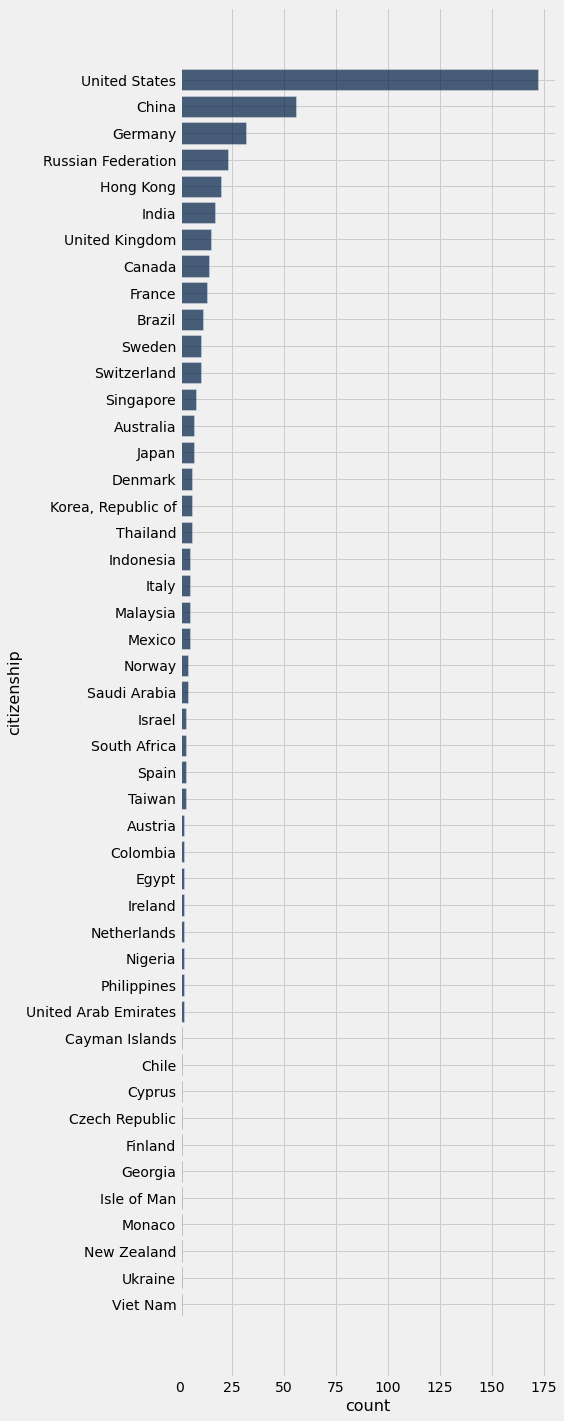

In [131]:
billionaires.group('citizenship').sort(1, descending=True).barh('citizenship')

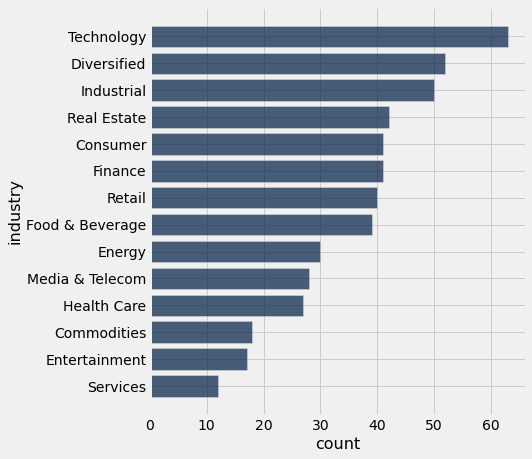

In [132]:
billionaires.group('industry').sort(1, descending=True).barh('industry')

In [133]:
billionaires.pivot('industry', 'citizenship')

C:\Users\ksorauf\AppData\Local\Continuum\anaconda3\lib\site-packages\datascience\tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


citizenship,Commodities,Consumer,Diversified,Energy,Entertainment,Finance,Food & Beverage,Health Care,Industrial,Media & Telecom,Real Estate,Retail,Services,Technology
Australia,2,0,0,0,0,0,0,0,1,0,2,0,0,2
Austria,0,0,0,0,1,0,1,0,0,0,0,0,0,0
Brazil,1,0,0,0,0,5,3,0,1,0,0,0,0,1
Canada,1,0,0,1,0,0,1,0,0,7,0,3,0,1
Cayman Islands,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Chile,1,0,0,0,0,0,0,0,0,0,0,0,0,0
China,1,6,2,3,0,1,5,6,4,0,7,2,4,15
Colombia,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Cyprus,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Czech Republic,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [134]:
ceos = Table.read_table('ceo.csv')
ceos

company,ceo,party,amount
3M Co,Bob Ulrich,200,8500
3M Co,Linda Alvarado,100,11244.6
3M Co,Robert Ulrich,200,591450
AES Corporation,Andres Gluski,100,6000
AES Corporation,Charles Rossotti,100,2500
AES Corporation,Charles Rossotti,200,1000
AES Corporation,John Koskinen,100,19000
AES Corporation,Kristina Johnson,100,28480
AES Corporation,Philip Lader,100,2500
AES Corporation,Philip Odeen,100,750


C:\Users\ksorauf\AppData\Local\Continuum\anaconda3\lib\site-packages\datascience\tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


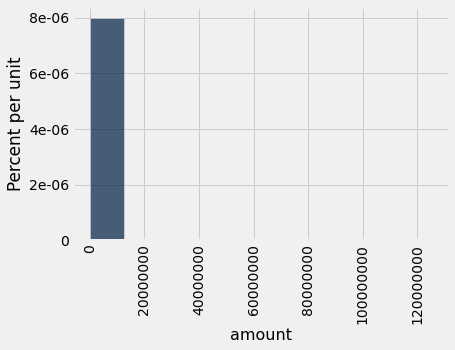

In [135]:
ceos.hist('amount')

In [136]:
ceos.sort('amount', descending=True)

company,ceo,party,amount
Hewlett-Packard Co,Margaret Whitman,200,1.25273e+08
Caterpillar Inc,Jon Huntsman,200,1.27686e+07
Las Vegas Sands,Sheldon Adelson,200,6.20425e+06
Las Vegas Sands,Sheldon g Adelson,200,5e+06
Visteon,Harry Wilson,200,4.0304e+06
Yahoo! Inc,Daniel Loeb,200,2.51255e+06
YRC Worldwide Inc,Matthew Doheny,200,1.47332e+06
Charles Schwab Corp,Charles Schwab,200,1.2364e+06
DTE Energy,James Nicholson,200,986850
Limited Brance,Leslie Wexner,200,942800


In [137]:
ceos.sort('amount', descending=False)

company,ceo,party,amount
Bristol-Myers Squibb Company,Robert Williams,100,9
Amgen Inc,Gil Omenn,100,10
Bristol-Myers Squibb Company,Michael Grobstein,100,10
Caterpillar Inc,Leon Patten,100,10
Caseys General Stores,Richard Wilkey,100,23
AK Steel,William Gerber,200,25
Hollyfrontier Corporation,Matthews Clifton,100,25
Nordstrom Inc,Alison Winter,100,25
Calpine,Rob Mosbacher,100,35
CF Industries Holdings,John Johnson,100,40


C:\Users\ksorauf\AppData\Local\Continuum\anaconda3\lib\site-packages\datascience\tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


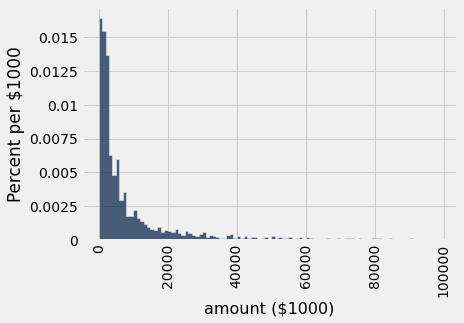

In [138]:
ceos.hist('amount', bins=np.arange(0, 1e5, 1e3), unit='$1000')

In [139]:
b_donations = billionaires.join('name', ceos, 'ceo')
b_donations.show()

name,net worth,citizenship,industry,company,party,amount
Barry Diller,5479965153,United States,Technology,Coca-Cola Co,100,107500
Carl Icahn,20515698449,United States,Diversified,CVR Energy,100,3000
Carl Icahn,20515698449,United States,Diversified,CVR Energy,200,225900
Charles Dolan,5387774353,United States,Media & Telecom,Cablevision,100,39400
Charles Dolan,5387774353,United States,Media & Telecom,Cablevision,200,107000
Charles Johnson,4587892463,United States,Finance,Franklin Resources,200,858000
Charles Koch,61046822719,United States,Industrial,Assurant,100,1500
Charles Koch,61046822719,United States,Industrial,Assurant,200,25400
Charles Schwab,9063879795,United States,Finance,Charles Schwab Corp,100,1800
Charles Schwab,9063879795,United States,Finance,Charles Schwab Corp,200,1.2364e+06


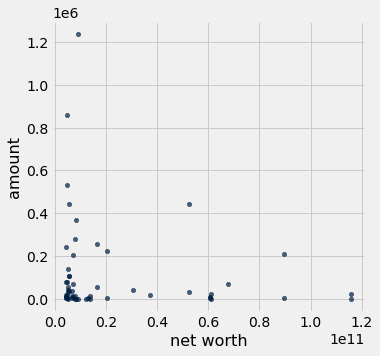

In [140]:
b_donations.where('amount', are.below(6e6)).scatter('net worth', 'amount')

In [141]:
donation_prop = b_donations.column('amount') / b_donations.column('net worth')
b_donations = b_donations.with_column('Contribution%', donation_prop)
b_donations = b_donations.sort('amount', descending=True)
b_donations.set_format('Contribution%', PercentFormatter)
b_donations.show(20)

name,net worth,citizenship,industry,company,party,amount,Contribution%
Sheldon Adelson,38008857087,United States,Entertainment,Las Vegas Sands,200,6.20425e+06,0.02%
Charles Schwab,9063879795,United States,Finance,Charles Schwab Corp,200,1.2364e+06,0.01%
Charles Johnson,4587892463,United States,Finance,Franklin Resources,200,858000,0.02%
Kelcy Warren,4595072119,United States,Energy,Energy Transfer,200,529886,0.01%
Jim Walton,52493506006,United States,Retail,Wal-Mart Stores Inc,200,444700,0.00%
Ray Hunt,5421192714,United States,Energy,PepsiCo Inc,200,442364,0.01%
Richard Kinder,8398076785,United States,Energy,Kinder Morgan,200,368000,0.00%
John Malone,8069296402,United States,Media & Telecom,Liberty Global,200,280050,0.00%
Eric Schmidt,16579148665,United States,Technology,google,100,257300,0.00%
Reed Hastings,4569628489,United States,Technology,Facebook,100,241700,0.01%


In [145]:
b_donations.pivot('name', 'party').group('party', np.sum)

C:\Users\ksorauf\AppData\Local\Continuum\anaconda3\lib\site-packages\datascience\tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


party,Barry Diller sum,Carl Icahn sum,Charles Dolan sum,Charles Johnson sum,Charles Koch sum,Charles Schwab sum,David Bonderman sum,Dick Schulze sum,Eric Schmidt sum,Gordon Moore sum,Henry Kravis sum,Howard Schultz sum,Jane Lauder sum,Jeff Bezos sum,Jim Walton sum,John Brown sum,John Malone sum,Kelcy Warren sum,Lakshmi Mittal sum,Les Wexner sum,Michael Dell sum,Phil Knight sum,Ralph Lauren sum,Ray Hunt sum,Reed Hastings sum,Richard Kinder sum,Ronda Stryker sum,Rupert Murdoch sum,Sam Zell sum,Sergey Brin sum,Sheldon Adelson sum,Steve Ballmer sum,Thomas Frist sum,Walter Scott sum,Warren Buffett sum
100,1,1,1,0,1,1,1,0,1,0,1,1,0,1,1,2,0,1,1,0,0,0,1,0,1,1,1,1,0,1,0,1,1,1,1
200,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1


In [146]:
b_donations.pivot('party', 'name', values = 'amount', collect = np.sum).sort('200', descending = True)

name,100,200
Sheldon Adelson,0,6.20425e+06
Charles Schwab,1800,1.2364e+06
Charles Johnson,0,858000
Kelcy Warren,7200,529886
Jim Walton,34500,444700
Ray Hunt,0,442364
Richard Kinder,1000,368000
John Malone,0,280050
Carl Icahn,3000,225900
Henry Kravis,8300,206349


In [147]:
b_donations.pivot('party', 'name', values = 'amount', collect = np.sum).sort('100', descending = True)

name,100,200
Eric Schmidt,257300,55500
Reed Hastings,241700,11000
Warren Buffett,208700,5100
Barry Diller,107500,0
John Brown,80712,18000
Howard Schultz,79050,19500
Ralph Lauren,71600,0
Sergey Brin,71600,0
David Bonderman,42500,54050
Charles Dolan,39400,107000


In [163]:
b_donations.pivot('party', 'name', values = 'amount', collect = np.sum)

dem_vs_rep = Table().with_columns('dem', b_donations.pivot('party', 'name', values = 'amount', collect = np.sum).column('100').sum(),
                                 'rep', b_donations.pivot('party', 'name', values = 'amount', collect = np.sum).column('200').sum())

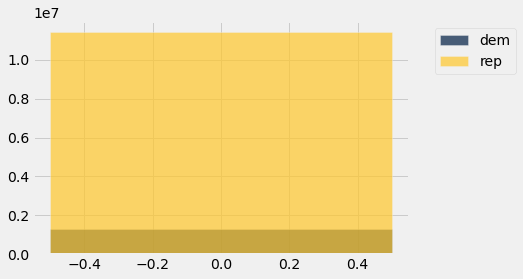

In [165]:
dem_vs_rep.bar()